# 1. Machine Learning & Regression

Machine Learning is a field of artificial intelligence (AI) that focuses on developing algorithms and models that enable computers to learn patterns from data.

* Not explicitly programmed.
* Machine Learns patterns.
* The more the data, more patterns learned and better results.

## Types of Machine Learning:

* **Supervised Learning:** The algorithm is trained on a labeled dataset, where the input data is paired with corresponding output labels. The goal is to learn a mapping from inputs to outputs.

* **Unsupervised Learning:** The algorithm is given unlabeled data and must find patterns or relationships within the data without explicit guidance.

* **Reinforcement Learning:** The algorithm learns by interacting with an environment and receiving feedback in the form of rewards or penalties. It aims to discover the best actions to take in different situations.

![](https://www.newtechdojo.com/wp-content/uploads/2020/06/ML-Types-1.png)

## Overfit and Underfit
* Overfitting: Occurs when a model learns the training data too well, capturing noise and outliers. It performs poorly on new, unseen data.

* Underfitting: Occurs when a model is too simple to capture the underlying patterns in the data, leading to poor performance on both training and new data.

![](https://cdn-images-1.medium.com/v2/resize:fit:1600/1*JZbxrdzabrT33Yl-LrmShw.png)


## Bias and Variance
* Bias: Error introduced by approximating a real-world problem, which may be complex, by a simple model. High bias can lead to underfitting.

* Variance: The model's sensitivity to small fluctuations in the training data. High variance can lead to overfitting.

![](https://nvsyashwanth.github.io/machinelearningmaster/assets/images/bias_variance.jpg)

## Metrics of Evaluation in Regression
* Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.

* Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.

* R-squared: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

![](https://www.freecodecamp.org/news/content/images/2022/08/image.png)

## Regression
* Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables.

## Types:
1.   Linear Regression
2.   Multiple Linear Regression
3.   Polynomial Regression
4.   Ridge and Lasso Regression

## Cost Function
To quantify how well a machine learning model's predictions align with the actual values or labels in the training dataset. The goal is to minimize this cost function during the training process, which involves adjusting the model's parameters.
![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Linearregressioncostfunction.png)

## Gradient Descent
An optimization algorithm used to minimize a function iteratively. In the context of machine learning, it is commonly employed to minimize the cost function associated with training a model.
![](https://cdn.builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/gradient-descent-learning-rate.png)




### 1. Linear Regression

It assumes that there is a linear relationship between the input features and the output.

y = mx+b

m: slope

b: y-intercept

In [2]:
import math
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

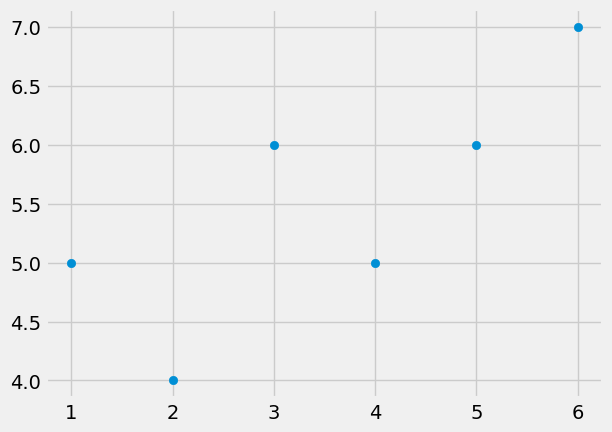

In [6]:
xs = np.array([1,2,3,4,5,6], dtype = np.float64)
ys = np.array([5,4,6,5,6,7], dtype = np.float64)
plt.scatter(xs, ys)
plt.show()

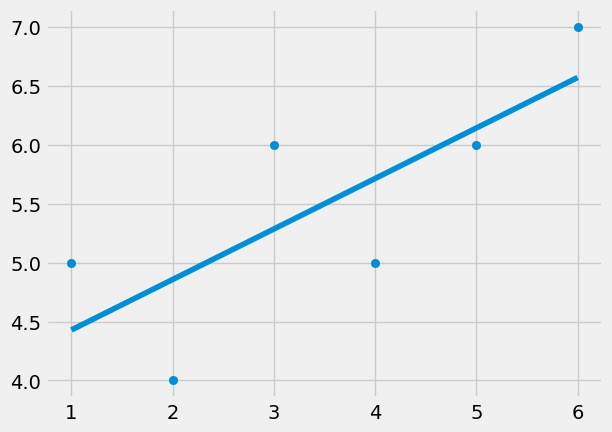

In [9]:
def best_fit_slope(xs, ys):
    m = (mean(xs) * mean(ys) - mean(xs * ys)) / (mean(xs)*mean(xs) - mean(xs*xs))
    return m

def calculate_b(xs, ys):
    b = mean(ys) - m*mean(xs)
    return b

m = best_fit_slope(xs, ys)
b = calculate_b(xs, ys)

regression_line = [(m * x) + b for x in xs]

plt.plot(xs, regression_line)
plt.scatter(xs,ys)

Linear Regression with Sklearn

Text(0, 0.5, 'y values')

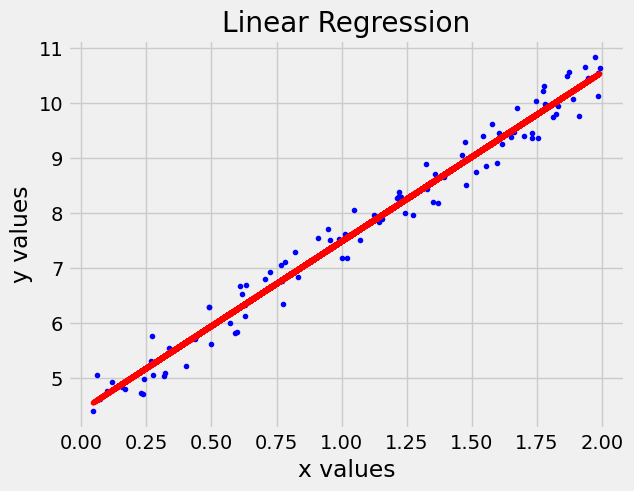

In [12]:
from sklearn.linear_model import LinearRegression

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100,1)

lin_reg = LinearRegression()
lin_reg.fit(x, y)

lin_reg.intercept_, lin_reg.coef_

plt.plot(x, y, 'b.')
plt.plot(x, lin_reg.predict(x), 'r-')
plt.title('Linear Regression')
plt.xlabel('x values')
plt.ylabel('y values')

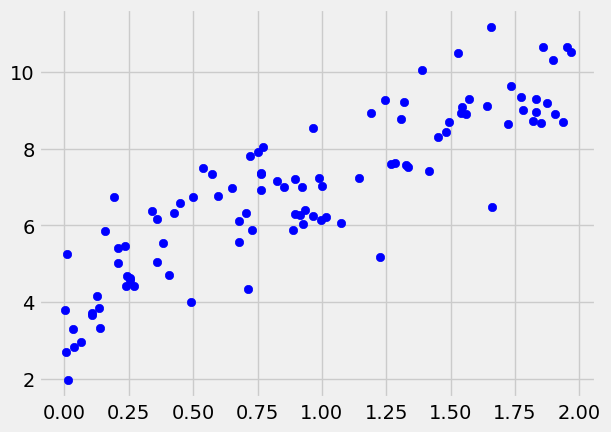

In [17]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y, color='blue', label='Data Points')
plt.show()

### Multiple Linear Regression:

Multiple Linear Regression extends linear regression to multiple independent variables. It models the relationship between the dependent variable and two or more independent variables by fitting a linear equation to the observed data.

y = a1 * x1 + a2 * x2 + ... + an * xn + b

Multiple Linear Regression Prediction: [[10.25909668]]


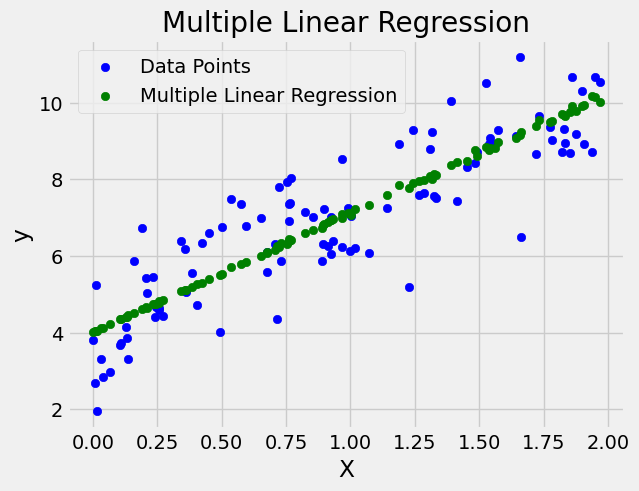

Multiple Linear Regression MSE: 0.9326733805591065
Multiple Linear Regression R-squared: 0.6841498624497007


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_mult = np.hstack([X,  100*X*np.random.randn(100, 1)])
X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X_mult, y, test_size=0.2, random_state=42)

mult_lin_reg = LinearRegression()
mult_lin_reg.fit(X_mult_train, y_mult_train)

# Model usage
X_test_mult = np.array([[2, 2.5]])  # Example input for prediction
prediction_mult = mult_lin_reg.predict(X_test_mult)
print("Multiple Linear Regression Prediction:", prediction_mult)

# Visualization
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(X, mult_lin_reg.predict(X_mult), color='green', label='Multiple Linear Regression')
plt.title('Multiple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluation using Mean Squared Error and R-squared
y_pred_mult = mult_lin_reg.predict(X_mult_test)
mse_mult = mean_squared_error(y_mult_test, y_pred_mult)
r2_mult = r2_score(y_mult_test, y_pred_mult)
print("Multiple Linear Regression MSE:", mse_mult)
print("Multiple Linear Regression R-squared:", r2_mult)

### Polynomial Regression

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable x and dependent variable y is modeled as n-th degree poynomial.

y = a1 * x^n + a2 * x^(n-1) + ... + b  

Polynomial Regression Prediction: [[9.68641732]]


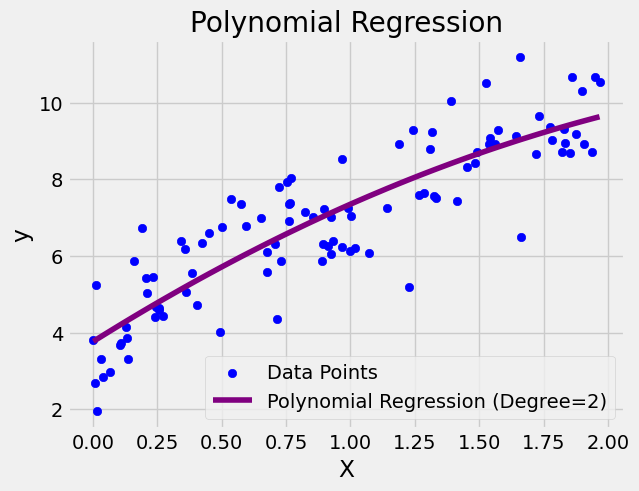

Polynomial Regression MSE: 0.9805733393796879
Polynomial Regression R-squared: 0.7709065111123543


In [22]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Model usage
X_test_poly = np.array([[2]])  # Example input for prediction
X_test_poly_transformed = poly_features.transform(X_test_poly)
prediction_poly = poly_reg.predict(X_test_poly_transformed)
print("Polynomial Regression Prediction:", prediction_poly)

# Visualization
X_poly_sorted, y_poly_pred_sorted = zip(*sorted(zip(X, poly_reg.predict(X_poly))))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_poly_sorted, y_poly_pred_sorted, color='purple', label='Polynomial Regression (Degree=2)')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluation using Mean Squared Error and R-squared
y_pred_poly = poly_reg.predict(X_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)
print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R-squared:", r2_poly)

### Ridge Regression

Ridge Regression is a regularized linear regression technique that introduces a penalty term to the linear regression cost function. It helps prevent overfitting by adding a regularization term that discourages large coefficients.

![Alt text](https://vitalflux.com/wp-content/uploads/2022/04/Ridge-regression-cost-function-2.png)


Ridge Regression Prediction: [[10.00800958]]


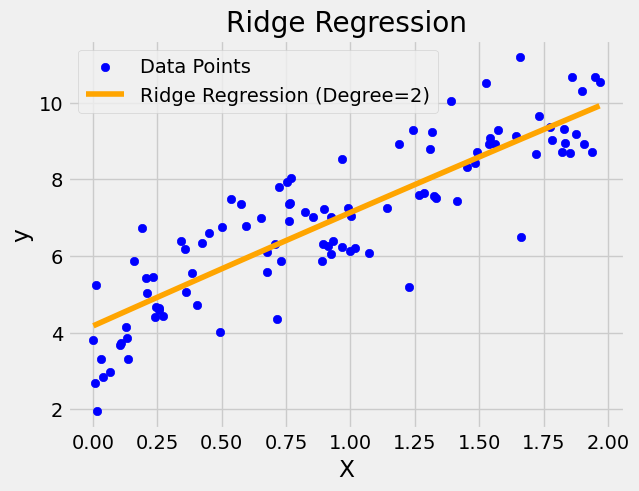

Ridge Regression MSE: 1.0170909149864067
Ridge Regression R-squared: 0.7623748302421056


In [23]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_poly, y)

# Model usage
X_test_ridge = np.array([[2]])  # Example input for prediction
X_test_ridge_transformed = poly_features.transform(X_test_ridge)
prediction_ridge = ridge_reg.predict(X_test_ridge_transformed)
print("Ridge Regression Prediction:", prediction_ridge)

# Visualization
X_ridge_sorted, y_ridge_pred_sorted = zip(*sorted(zip(X, ridge_reg.predict(X_poly))))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_ridge_sorted, y_ridge_pred_sorted, color='orange', label='Ridge Regression (Degree=2)')
plt.title('Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluation using Mean Squared Error and R-squared
y_pred_ridge = ridge_reg.predict(X_poly)
mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R-squared:", r2_ridge)

### Lasso Regression

![](https://vitalflux.com/wp-content/uploads/2020/10/Screenshot-2020-10-07-at-2.33.25-PM.png)

Lasso Regression Prediction: [10.04290229]


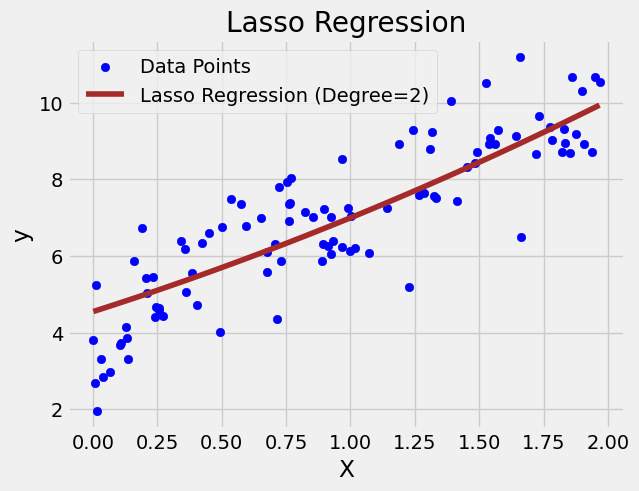

Lasso Regression MSE: 1.0943313466145101
Lasso Regression R-squared: 0.7443289796624193


In [25]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, y)

# Model usage
X_test_lasso = np.array([[2]])  # Example input for prediction
X_test_lasso_transformed = poly_features.transform(X_test_lasso)
prediction_lasso = lasso_reg.predict(X_test_lasso_transformed)
print("Lasso Regression Prediction:", prediction_lasso)

# Visualization
X_lasso_sorted, y_lasso_pred_sorted = zip(*sorted(zip(X, lasso_reg.predict(X_poly))))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_lasso_sorted, y_lasso_pred_sorted, color='brown', label='Lasso Regression (Degree=2)')
plt.title('Lasso Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluation using Mean Squared Error and R-squared
y_pred_lasso = lasso_reg.predict(X_poly)
mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_lasso = r2_score(y, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R-squared:", r2_lasso)